Noticed that sometimes bad data has significant negative effects on tracking, including detecting non-existant features. The two cases are: 1. Missing data regions differing between channels and 2. Striping due to detector faults

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
from tobac_flow.flow import Flow
from tobac_flow import io, abi

import cv2 as cv
from scipy import ndimage as ndi

from matplotlib import pyplot as plt

In [2]:
# Case of striping due to bad detector stripes
goes_data_path = '../data/GOES16'
start_date = datetime(2018,5,20,12)
cmip_files = io.find_abi_files(start_date, satellite=16, product='MCMIP', view='C', mode=3, 
                              save_dir=goes_data_path, 
                              replicate_path=True, check_download=True, 
                              n_attempts=1, download_missing=True)
             
ds_slice = {'x':slice(500,1750), 'y':slice(250,1000)}
cmip_ds = xr.open_dataset(cmip_files[-1]).isel(ds_slice)


Text(0.5, 1.0, 'Bad detector striping in channel 10')

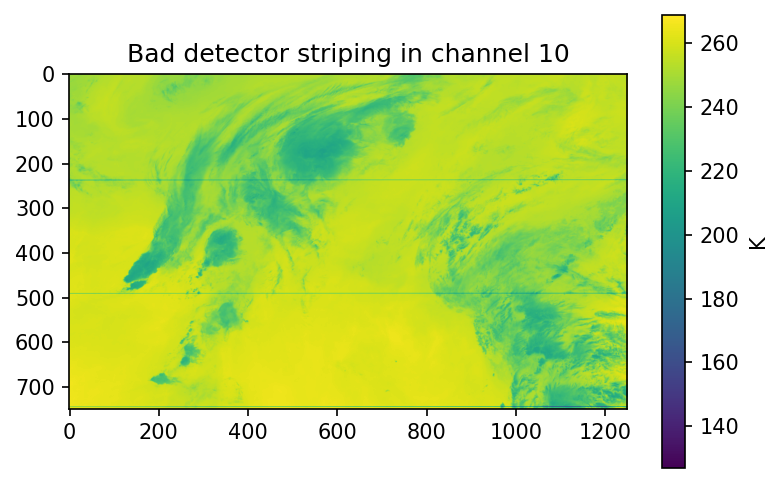

In [3]:
plt.figure(dpi=150)
plt.imshow(cmip_ds.CMI_C10)
plt.colorbar(label="K")
plt.title("Bad detector striping in channel 10")

Text(0.5, 1.0, 'Bad detector striping in channel 10 - No DQF flag!')

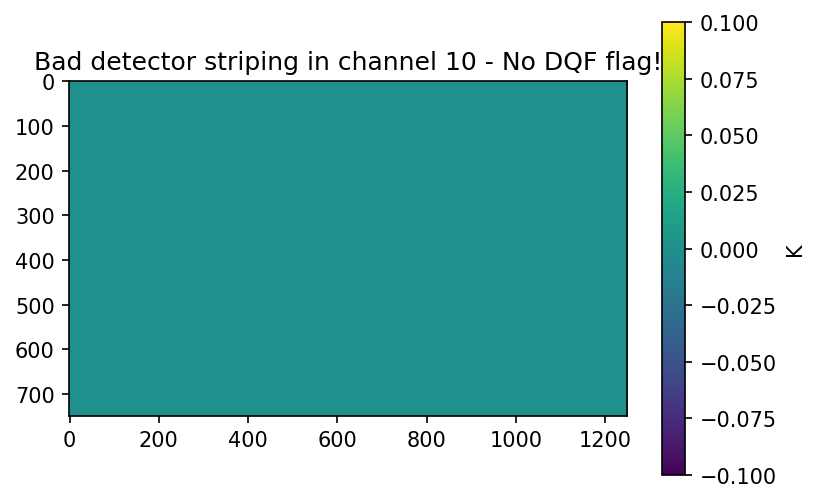

In [4]:
plt.figure(dpi=150)
plt.imshow(cmip_ds.DQF_C10)
plt.colorbar(label="K")
plt.title("Bad detector striping in channel 10 - No DQF flag!")

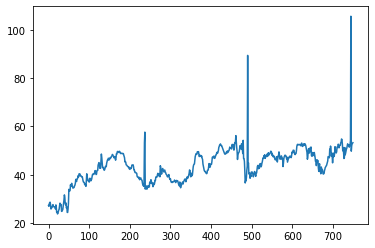

In [5]:
# Now test for stripes - look at range of values over each row
plt.plot(cmip_ds.CMI_C10.max('x')-cmip_ds.CMI_C10.min('x'))

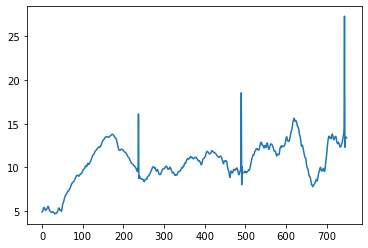

In [6]:
plt.plot(cmip_ds.CMI_C10.std('x'))

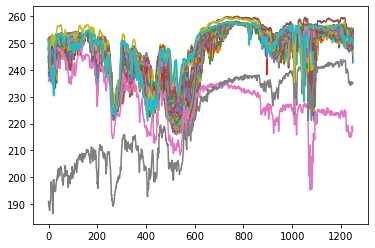

In [7]:
plt.plot(cmip_ds.CMI_C10[200:250].T)

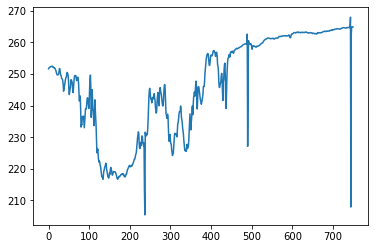

In [8]:
plt.plot(cmip_ds.CMI_C10[:,500])

In [9]:
np.argmin(cmip_ds.CMI_C10[:,500].data)

237

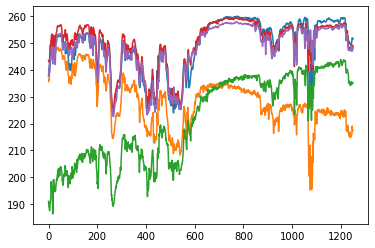

In [10]:
plt.plot(cmip_ds.CMI_C10[235:240].T)

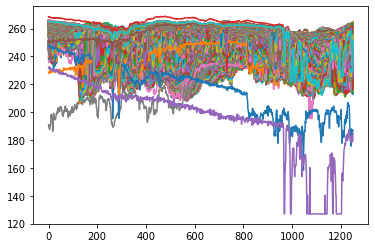

In [11]:
plt.plot(cmip_ds.CMI_C10.T)

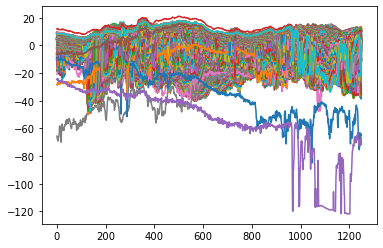

In [12]:
plt.plot((cmip_ds.CMI_C10-cmip_ds.CMI_C10.mean('y')).T)

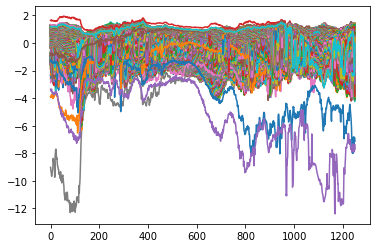

In [13]:
y_mean = cmip_ds.CMI_C10.mean('y')
y_std = cmip_ds.CMI_C10.std('y')
normalised_diff = (cmip_ds.CMI_C10-y_mean)/y_std
plt.plot(normalised_diff.T)

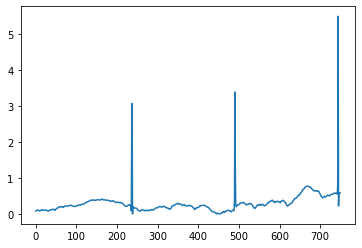

In [14]:
plt.plot(np.abs(normalised_diff.mean('x')))

In [15]:
np.where(np.abs(normalised_diff.mean('x'))>1)

(array([236, 237, 490, 491, 744]),)

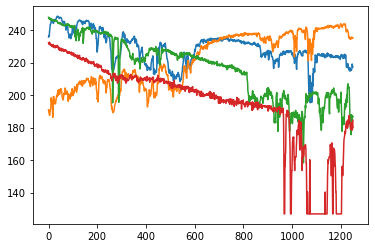

In [16]:
plt.plot(cmip_ds.CMI_C10[np.where(np.abs(normalised_diff.mean('x'))>1.5)].T)

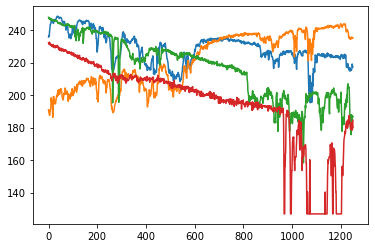

In [17]:
plt.plot(cmip_ds.CMI_C10[np.where(np.abs(normalised_diff.mean('x'))>2)].T)

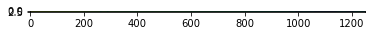

In [18]:
plt.imshow(cmip_ds.CMI_C10[np.where(np.abs(normalised_diff.mean('x'))>1.5)])

In [19]:
def get_stripe_deviation(da):
    y_mean = da.mean('y')
    y_std = da.std('y')
    return np.abs(((da-y_mean)/y_std).mean('x'))


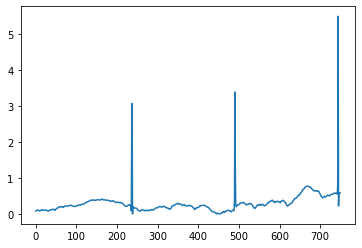

In [20]:
plt.plot(get_stripe_deviation(cmip_ds.CMI_C10))

In [23]:
wh_stripes = np.where(get_stripe_deviation(cmip_ds.CMI_C10)>2)

(array([236, 237, 490, 744]),)

In [ ]:
cmip_ds = xr.open_dataset(cmip_files[-1]).isel(ds_slice)


In [21]:
# Test against known good data
goes_data_path = '../data/GOES16'
start_date = datetime(2018,6,19,17)
test_files = io.find_abi_files(start_date, satellite=16, product='MCMIP', view='C', mode=3, 
                              save_dir=goes_data_path, 
                              replicate_path=True, check_download=True, 
                              n_attempts=1, download_missing=True)
ds_slice = {'x':slice(500,1750), 'y':slice(250,1000)}
test_ds = xr.open_dataset(test_files[-1]).isel(ds_slice)

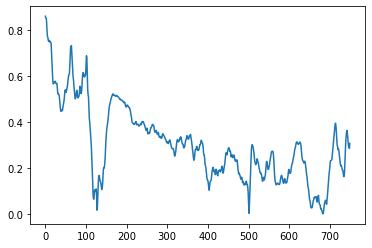

In [22]:
plt.plot(get_stripe_deviation(test_ds.CMI_C10))